# EDSA Movie Recommendation System Project


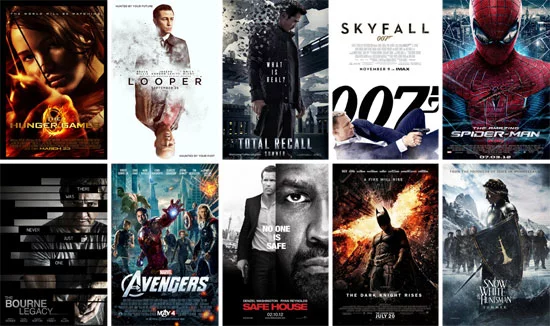


### Predict Overview: EDSA Movie Recommedation Challenge

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

### Problem Statement
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

<a id="cont"></a>

## Table of Contents


<a href=#one>1. Start Comet Experiment</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modelling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8.  Conclusion</a>

<a id="one"></a>
## 1. Start Comet Experiment
<a href=#cont>Back to Table of Contents</a>

Comet ML is an experimentation platform, which permits testing Machine Learning projects, from the beginning up to the final monitoring.

Doing ML with Comet is like building with legos. You can customize and combine your data, code, visualizations, reports, and much more to create exactly what you want.

So we start by integrating our notebook with Comet.ml so that we can see everything we will do with our data.


In [60]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="vsNTC2o8UVKvzgsD124nWXkbt",
    project_name="unsupervised-learning-team-11-predict-project",
    workspace="beebeefaith",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/beebeefaith/unsupervised-learning-team-11-predict-project/f58bf58430004d38b7824b9d0382cd8b
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git reposi

 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section all required libraries that will be used throughtout this notebook were imported. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS


# for Exploratory Data Analysis
# from pandas_profiling import ProfileReport


# # Building recommender systems 
# from surprise import Dataset
# from surprise import Reader
# from surprise import accuracy
# from surprise import SVD
# from surprise import KNNWithMeans
# from surprise.model_selection import cross_validate
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore warnings 
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)



<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section  all the csv files required during the analysis and modelling were loaded into a pandas DataFrame. |

---

In [2]:
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# loaded the movies, imdb_data, tags, train and test data into their respective DataFrames
movies = pd.read_csv('movies.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [4]:
#shape of the datasets
shape = {   'Movies': movies.shape,
            'imdb_data': imdb_data.shape,
            'Genome scores': genome_scores.shape,
            'Genome tags':genome_tags .shape,
            'Links': links.shape,
            'Tags': tags.shape,
            'Train': train.shape,
            'Test': test.shape}

df_shape = pd.DataFrame(list(shape.items()), columns=['Data Frame', 'Shape'])
df_shape


Data Frame          Shape
0         Movies     (62423, 3)
1      imdb_data     (27278, 6)
2  Genome scores  (15584448, 3)
3    Genome tags      (1128, 2)
4          Links     (62423, 3)
5           Tags   (1093360, 4)
6          Train  (10000038, 4)
7           Test   (5000019, 2)

In [5]:
# Display the first 5 entries in each dataframe
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [6]:
# Display the first 5 entries in each dataframe
imdb_data.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [7]:
# Display the first 5 entries in each dataframe
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [8]:
# Display the first 5 entries in each dataframe
train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [9]:
# Display the first 5 entries in each dataframe
test.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [10]:
# Count the number of unique entries for features of interest -movieId,tags,userId,directors,title cast
unique_movies = len(movies['movieId'].unique().tolist())
unique_tags = len(tags['tag'].unique().tolist())
unique_users = len(train['userId'].unique().tolist())
unique_directors = len(imdb_data['director'].unique().tolist())
unique_actors = len(imdb_data['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

number of unique entries for features of interest


unique_entries
movies              62423
tags                73051
users              162541
directors           11787
actors              17144

In [12]:
#checking for null values
print("Train: ")
print(str(train.isnull().sum()))
print("************")
print("Test: ")
print(str(test.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies.isnull().sum()))
print("************")
print("Links: ")
print(str(links.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_data.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


In [13]:
#  min and max ratings received
min_rating = train.rating.min()
max_rating = train.rating.max()

print(min_rating)
print(max_rating)

0.5
5.0


C:\Users\Nigeria\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nigeria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Average rating in dataset: 3.5333951730983424


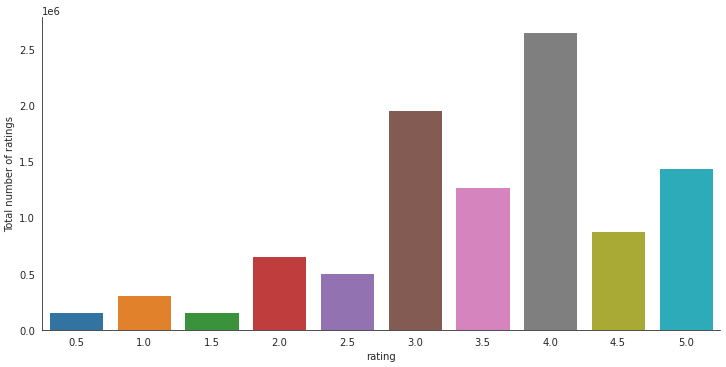

In [14]:
#Visual rating distribution
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train["rating"])}')

######  --Observations--

from the graph we can movies are rated between 0 and 5 with the lowest rating been 0.5 and the highest been 5.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, an in-depth analysis of all the variables in the DataFrames were performed. |

EDA is important because besides getting the basic insights and general understanding of our data, we can set the procedure and steps to follow on the entire modelling course.

---


In [58]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title ='Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:01<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We start by selecting the movie features we want to investigate and create a new dataframe containing these features.

## Popular Movies Genre

In [15]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])


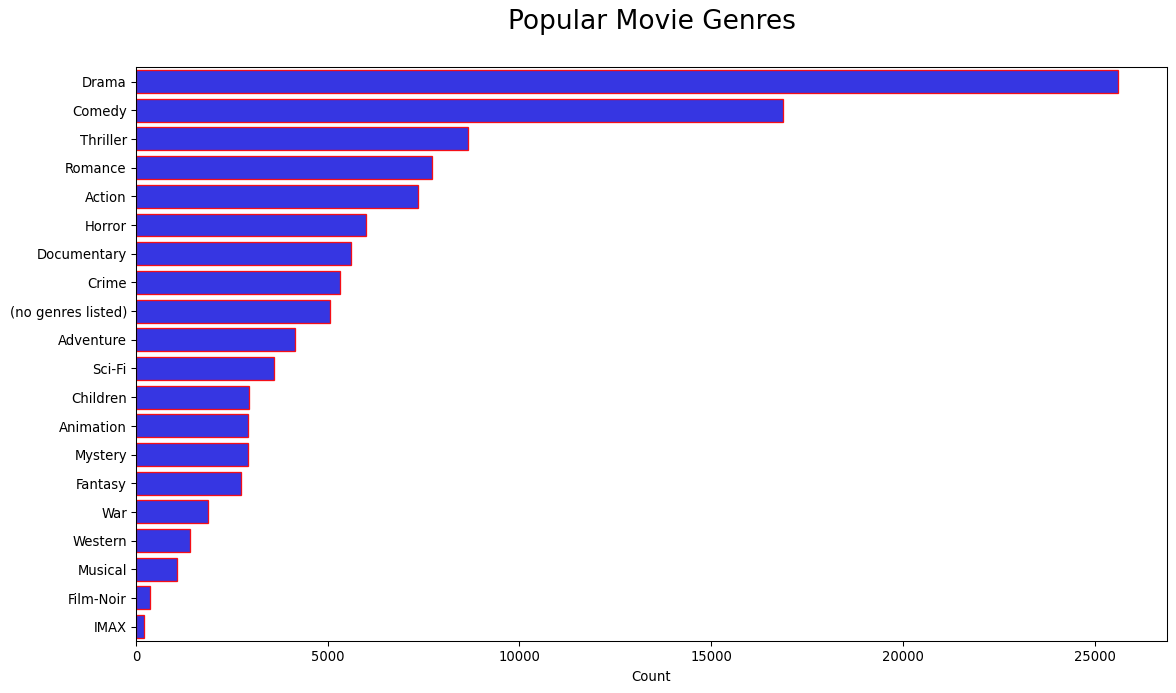

In [16]:
# Plot the genres from most common to 90 common
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,order=movies_genres['genres']
              .value_counts(ascending=False).index, color='b', ec= 'red', alpha=0.9)
plt.ylabel('')
plt.xlabel('Count')
plt.show()

## Popular Actors

In [17]:
movies_actor = pd.DataFrame(imdb_data[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])

movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))


movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Selecting the Top 50 actors in movies
movies_actor = movies_actor.head(50)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)

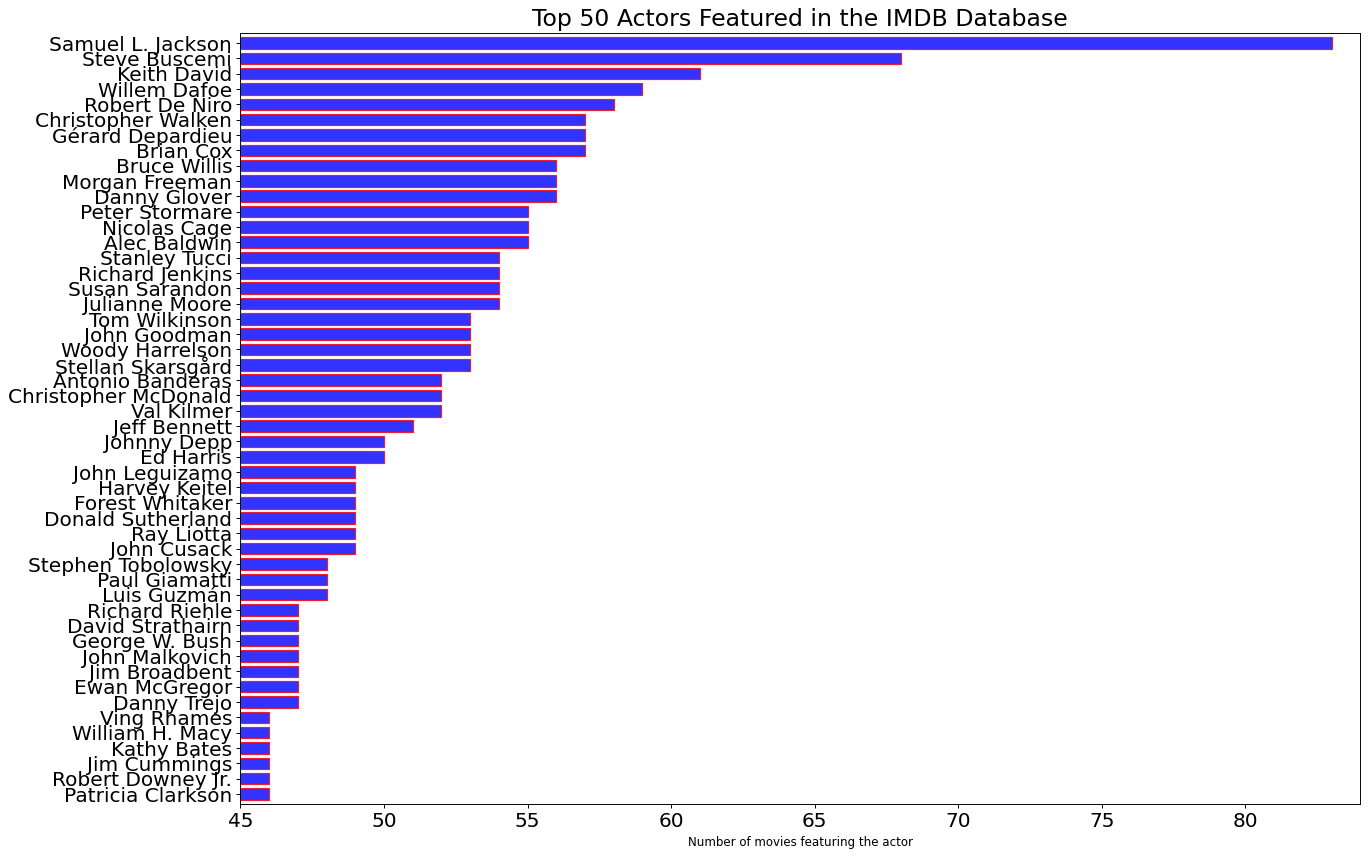

In [18]:
#Plot graph

y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='red', xlim=[45,84], width=.75, alpha=0.8)
ax.set_title('Top 50 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches



## Movie Directors

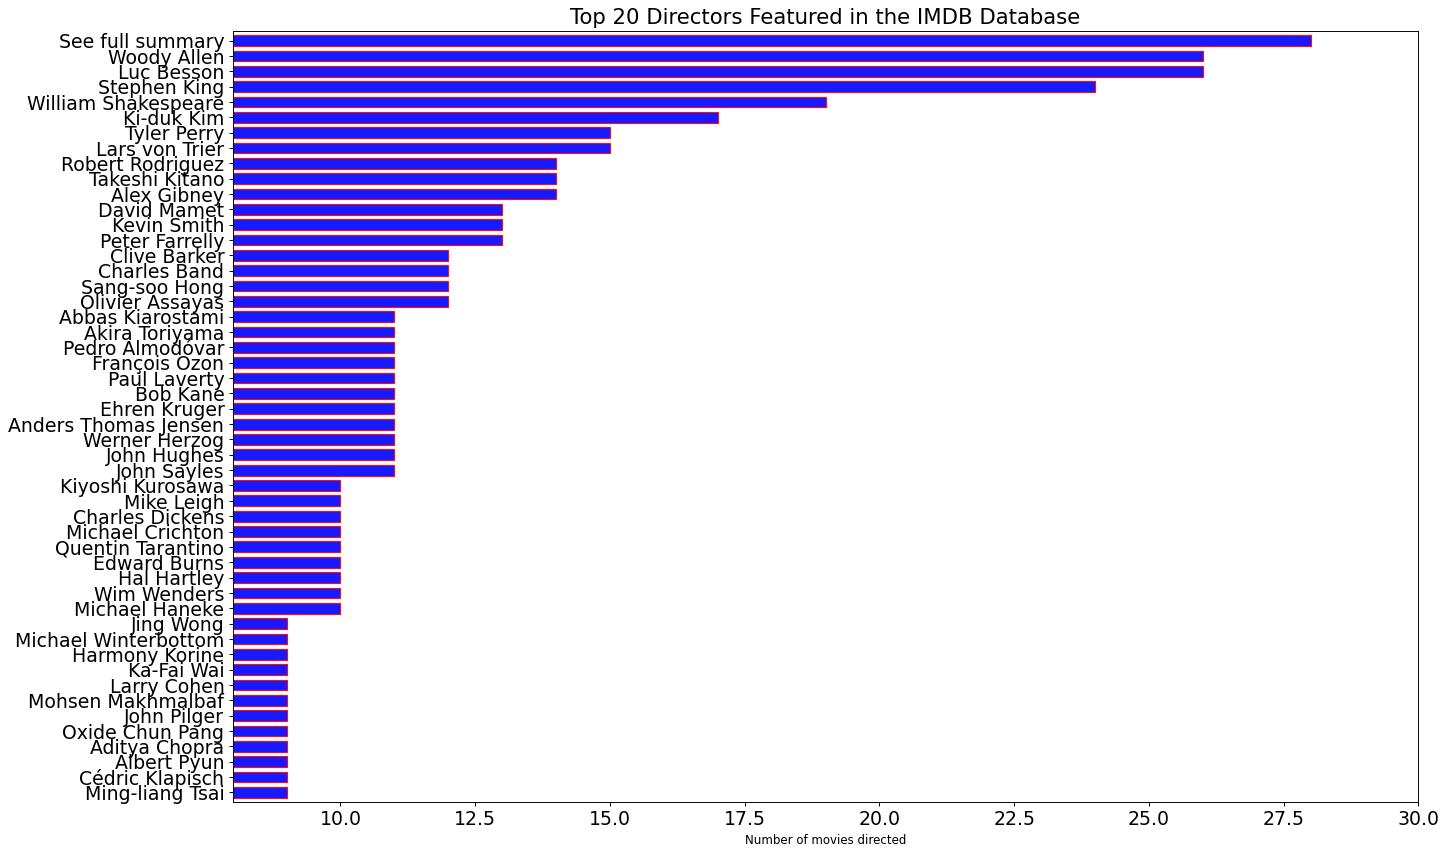

In [19]:
movies_director = pd.DataFrame(imdb_data[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director.head(50)
movies_director =movies_director.sort_values(by='count',ascending=True)

y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='b', edgecolor='red', 
                                   width=.7, fontsize=16, xlim=[8,30], alpha=0.9)
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches


## Plotting Keywords

In [20]:
movies_plot = pd.DataFrame(imdb_data[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split play plot seperated by "|" and create a list containing the play plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(50)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

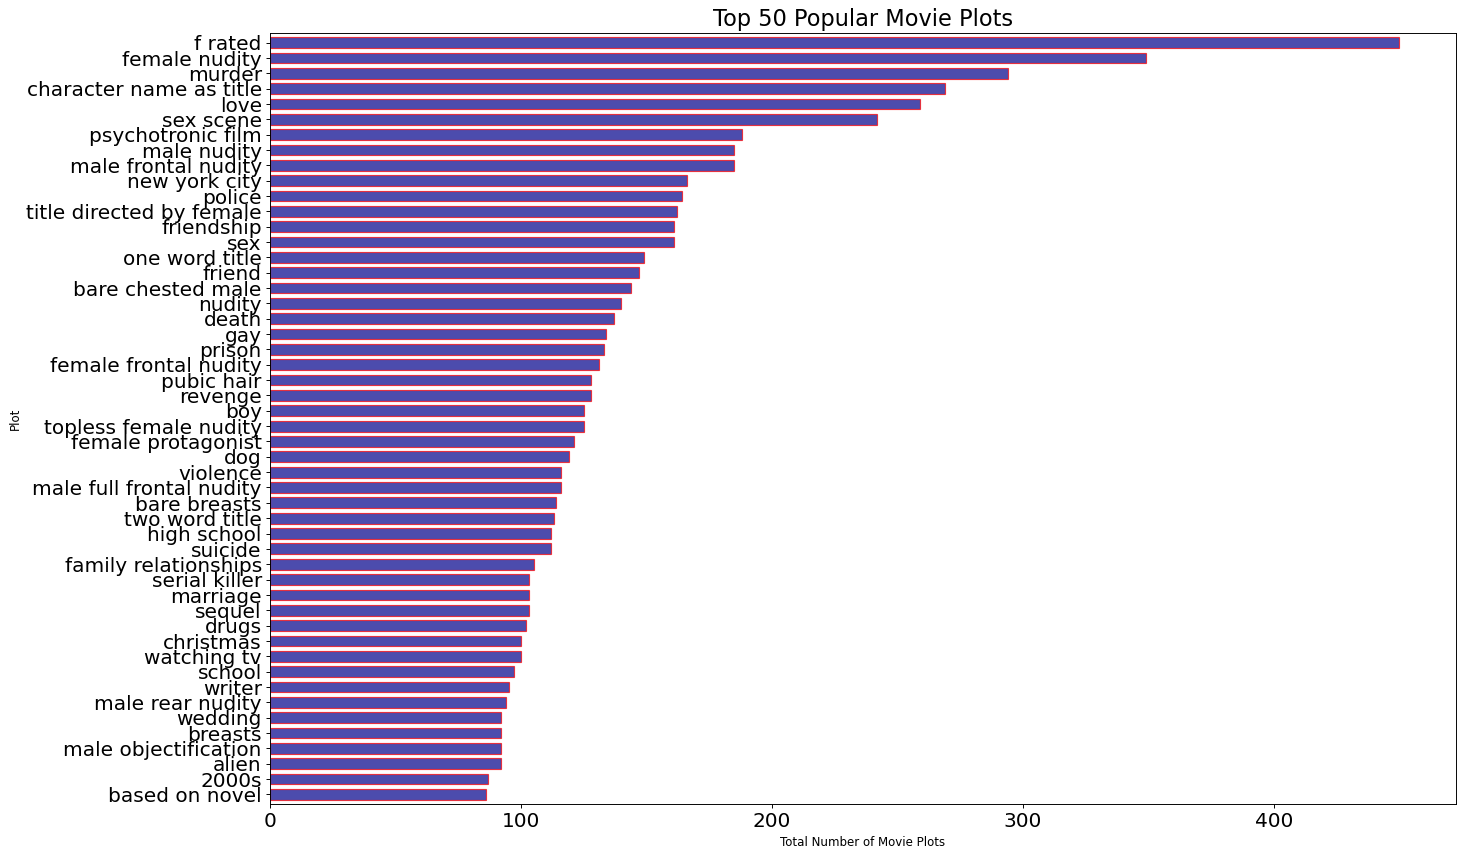

In [21]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='darkblue', fontsize=17,
                                           edgecolor='r', width=.7, alpha=0.7)
ax.set_title('Top 50 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

## Rating Distriution

In [22]:
# Create dataframe containing only the movieId and genres
movies_year = pd.DataFrame(movies[['movieId', 'title']],columns=['movieId', 'title'])
movies_year= movies_year[movies_year['title'].notnull()]
# Split the year from title
movies_year.title = movies_year.title.apply(lambda x: x[-5:-1])

movies_year = movies_year.groupby(['title'])['movieId'].count().reset_index(name="count")
movies_year =movies_year[movies_year['count'] > 500]
movies_year =movies_year.sort_values(by='count',ascending=True)

In [23]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [24]:
#Merging Movies and IMdb Dataframe

merged_inner = pd.merge(left=movies, right=imdb_data, left_on='movieId', right_on='movieId')
merged_inner.head(2)

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        2    Jumanji (1995)                   Adventure|Children|Fantasy   

                                          title_cast            director  \
0  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...       John Lasseter   
1  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...  Jonathan Hensleigh   

   runtime       budget                     plot_keywords  
0     81.0  $30,000,000  toy|rivalry|cowboy|cgi animation  
1    104.0  $65,000,000  board game|adventurer|fight|game

In [25]:
#User Rating

df_train = train.copy()
merged_train = pd.merge(left=movies, right=df_train, left_on='movieId', right_on='movieId')
merged_train.head(2)

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  timestamp  
0  158849     5.0  994716786  
1   97203     5.0  942683155

In [26]:
print("Total Number of Users who rated  movies:" ,len(df_train['userId'].unique()))
print("Maximum movies rating :" ,merged_train['rating'].max())
print("Lowest movies rating :" ,merged_train['rating'].min())

Total Number of Users who rated  movies: 162541
Maximum movies rating : 5.0
Lowest movies rating : 0.5


In [27]:
merged_train.rating = merged_train.rating.apply(lambda x: int(x))
Hi_rating_df =merged_train[merged_train['rating']==5]

Lo_rating_df =merged_train[merged_train['rating']==0]

Hi_rating_list =str(list(Hi_rating_df['title']))
Lo_rating_list =str(list(Lo_rating_df['title']))

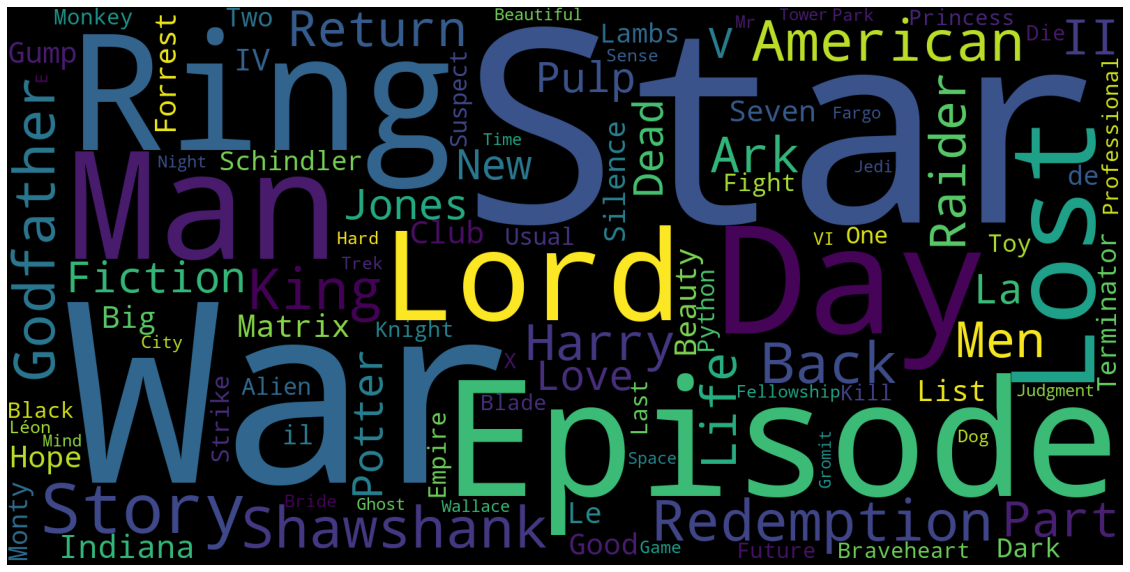

In [28]:
#Highest Rating

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Hi_rating_list)
plt.axis("off")
plt.imshow(wc)


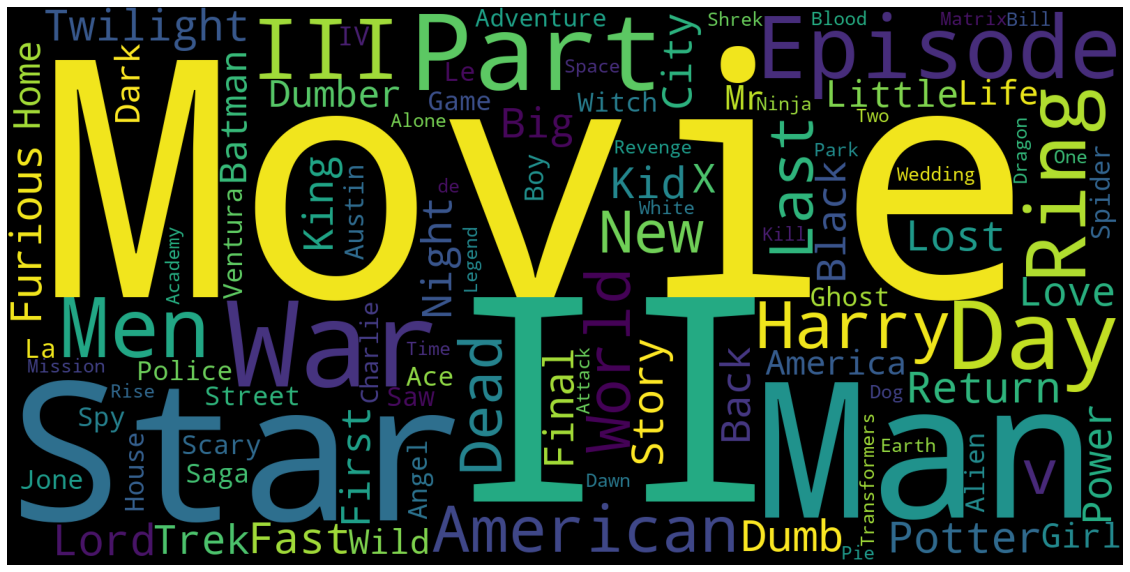

In [29]:
#Lowest Rating

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Lo_rating_list)
plt.axis("off")
plt.imshow(wc)

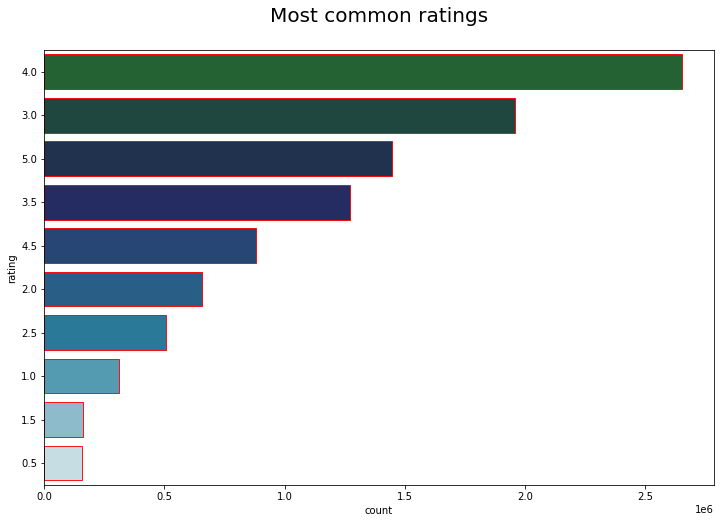

In [30]:
# Plot the ratings from most common to least common
ratings = train['rating'].value_counts(ascending=False).index.tolist()

plot = plt.figure(figsize=(12, 8))
plt.title('Most common ratings\n', fontsize=20)
sns.countplot(y="rating", data=train,
              order=ratings,
              palette='ocean', ec='r', alpha = 0.9)
plt.show()

**Observations:**

From the above graph we can see that most movies received better rating between 2 and 5, which can mean that most movies are good. With only few movies with less than 1 rating, meaning fewer movies are worse.

In [31]:
#Calculate the Mean of rating

df_rating = pd.merge(train, movies, on='movieId')
df_rating.groupby('title')['rating'].mean().head()

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.753731
#1 Cheerleader Camp (2010)                                 1.900000
#Female Pleasure (2018)                                    4.000000
#FollowMe (2019)                                           2.400000
Name: rating, dtype: float64

In [32]:
df_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Which Way Home (2009)               5.0
Kaakha Kaakha (2003)                5.0
Not Quite Human II (1989)           5.0
Selling Isobel (2018)               5.0
Sehar (2005)                        5.0
The Enchanted Sedan Chair (1905)    5.0
K.G.F: Chapter 1 (2018)             5.0
Hard Cash (2002)                    5.0
Everyone's Going to Die (2013)      5.0
Anything for Love (2016)            5.0
Name: rating, dtype: float64

In [33]:
#most rating
df_rating.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: rating, dtype: int64

Text(0.5, 1.0, 'Movies mean rating')

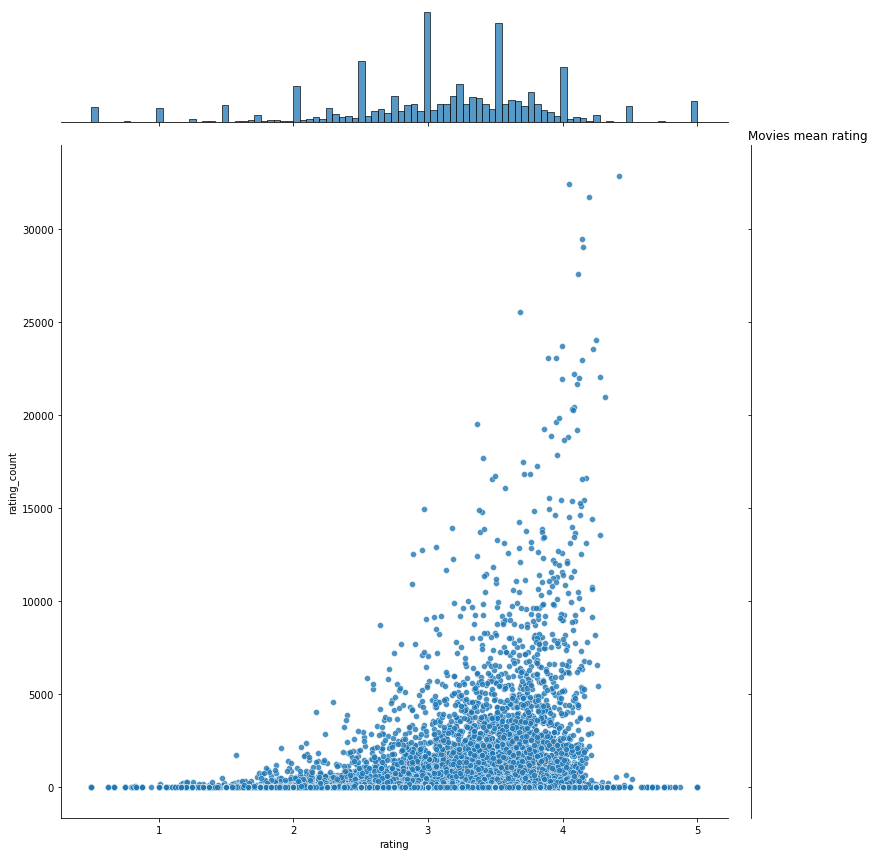

In [34]:
#Mean rating for each movie

mean_rating_count = pd.DataFrame(df_rating.groupby('title')['rating'].mean())
mean_rating_count['rating_count'] = pd.DataFrame(
    df_rating.groupby('title')['rating'].count())


#plot grapgh
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count',
              data=mean_rating_count, alpha=0.8, height=12)
plt.title("Movies mean rating")

In [35]:
#Total Count for each movie
df_rating.groupby('title')['rating'].count().sort_values(ascending=True).head(10)


title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    1
Love's Coming (2014)                                       1
Love's Brother (2004)                                      1
Love's Abiding Joy (2006)                                  1
Love on the Dole (1941)                                    1
Love on a Pillow (1962)                                    1
Love on Sunday (2006)                                      1
Love on Ice (2017)                                         1
Love of My Life (2013)                                     1
Love me! (2014)                                            1
Name: rating, dtype: int64

In [36]:
df_rating.groupby('userId')['rating'].count().sort_values(ascending=True).head(20)

userId
105714    1
53640     1
127098    1
121071    1
55362     1
79087     1
120862    2
153150    2
113147    2
138028    2
121459    2
107308    2
37386     2
991       2
73643     2
125954    2
49107     2
72605     2
67439     2
106298    2
Name: rating, dtype: int64

## Years with Most Released Movies

In [47]:
# We create a dataframe that merges all the features that we think might help us in solving the problem
df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
#Add colummn for release year
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)
df.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director                                      plot_keywords  \
0        John Lasseter                   toy|rivalry|cowboy|cgi animation   
1   Jonathan Hensleigh                   board game|adventurer|fight|game   
2  Mark Steven Johnson                         boat|lake|neighbor|rivalry   
3       Terry McMillan  black american|husband wife relationship|betra...   
4       Albert Hackett                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  year  
0                    Toy Story (1995)  1995  
1                      Jumanji (1995)  1995  
2             Grumpier Old Men (1995)  1995  
3            Waiting to Exhale (1995)  1995  
4  Father of the Bride Part II (1995)  1995

In [50]:
# Merge train with movies to join movie titles and ratings 
ratings = train.merge(movies, on='movieId', how='inner')

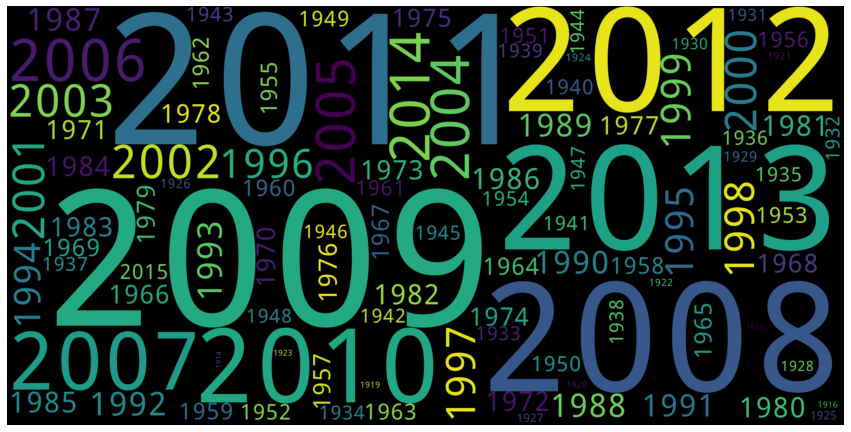

In [57]:
# Calculate number of ratings by year 
years = df['year'].value_counts()

#create a word cloud with max 100 
wordcloud = WordCloud(max_words=100, background_color='black', height=2000, width=4000).generate_from_frequencies(years)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

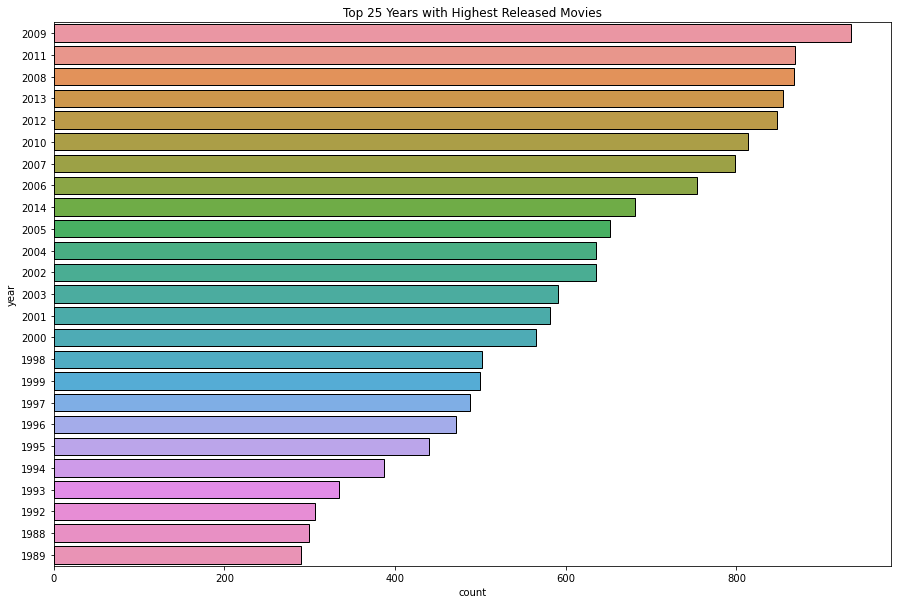

In [56]:
#plots for years
plt.figure(figsize=(15, 10))
ax = sns.countplot(y = df['year'], data = df, order = df['year'].value_counts().index[0:25] )

#add title
ax.set_title("Top 25 Years with Highest Released Movies")
plt.show()

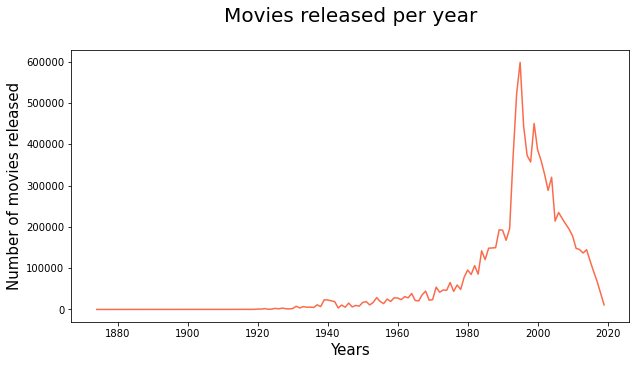

In [53]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)


# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add title and figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section the data was sujected to cleaning and creating new features . |

---
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. The presence of irrelevant characteristics in your Data can reduce the Model accuracy and cause your Model to train based on irrelevant features. In other words, if the features are strong enough, the Machine Learning Algorithm will give fantastic outcomes.

Feature engineering helps to glean better insights, for example with Wordcloud and Hashtag Analysis with the removal of words like 'https' which is noise, would not appear as an important word in all the sentiments analysis.

Feature Engineering is a journey, with some of the steps listed here:
    -Cleaning the data which entails removing URLS, word capitalization, punctuations, Non Ascii and Stopwords removal
    -Feature Selection which entails creating new features and dropping irrelevant ones if necessary
    -Handling missing values if there are any
    -Handling imbalanced data which helps in removing biases in the model
    -Handling outliers if there are any
    -Encoding the features or label to help train the model better, by transforming features and labels to the integer datatype.
    -Feature Scaling helps to train the model better as it puts the all the different features on the same scale hence we can analyse the relationships better, by reducing the variance effect

Walk with us as we learn and model the data, with each step getting us closer to our goal of efficiently predicting with precision our data.

In [37]:
#feature selection and creating a new dataframe
df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]

# merged the seleceted features of imdb_data with the selected features of the movies table
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')


df.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director                                      plot_keywords  \
0        John Lasseter                   toy|rivalry|cowboy|cgi animation   
1   Jonathan Hensleigh                   board game|adventurer|fight|game   
2  Mark Steven Johnson                         boat|lake|neighbor|rivalry   
3       Terry McMillan  black american|husband wife relationship|betra...   
4       Albert Hackett                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [38]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)
df.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director                                      plot_keywords  \
0        John Lasseter                   toy|rivalry|cowboy|cgi animation   
1   Jonathan Hensleigh                   board game|adventurer|fight|game   
2  Mark Steven Johnson                         boat|lake|neighbor|rivalry   
3       Terry McMillan  black american|husband wife relationship|betra...   
4       Albert Hackett                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [39]:
# Checking to see that all the column data types are correct
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24866 entries, 0 to 24865
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        24866 non-null  int64 
 1   title_cast     24866 non-null  object
 2   director       24866 non-null  object
 3   plot_keywords  24866 non-null  object
 4   genres         24866 non-null  object
 5   title          24866 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [40]:
# Removing spaces between names in the director column
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Removing spaces between names in the title_cast column
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

df.head()

movieId                                         title_cast  \
0        1  tomhanks|timallen|donrickles|jimvarney|wallace...   
1        2  robinwilliams|jonathanhyde|kirstendunst|bradle...   
2        3  waltermatthau|jacklemmon|sophialoren|ann-margr...   
3        4  whitneyhouston|angelabassett|lorettadevine|lel...   
4        5  stevemartin|dianekeaton|martinshort|kimberlywi...   

            director                                      plot_keywords  \
0       johnlasseter                   toy|rivalry|cowboy|cgi animation   
1  jonathanhensleigh                   board game|adventurer|fight|game   
2  markstevenjohnson                         boat|lake|neighbor|rivalry   
3      terrymcmillan  black american|husband wife relationship|betra...   
4      alberthackett                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [41]:
# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
df.head()

movieId                                  title_cast           director  \
0        1                tomhanks timallen donrickles       johnlasseter   
1        2     robinwilliams jonathanhyde kirstendunst  jonathanhensleigh   
2        3        waltermatthau jacklemmon sophialoren  markstevenjohnson   
3        4  whitneyhouston angelabassett lorettadevine      terrymcmillan   
4        5         stevemartin dianekeaton martinshort      alberthackett   

                                       plot_keywords  \
0                   toy|rivalry|cowboy|cgi animation   
1                   board game|adventurer|fight|game   
2                         boat|lake|neighbor|rivalry   
3  black american|husband wife relationship|betra...   
4                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [42]:
# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))
df.head()

movieId                                  title_cast           director  \
0        1                tomhanks timallen donrickles       johnlasseter   
1        2     robinwilliams jonathanhyde kirstendunst  jonathanhensleigh   
2        3        waltermatthau jacklemmon sophialoren  markstevenjohnson   
3        4  whitneyhouston angelabassett lorettadevine      terrymcmillan   
4        5         stevemartin dianekeaton martinshort      alberthackett   

                                       plot_keywords  \
0                   toy rivalry cowboy cgi animation   
1                   board game adventurer fight game   
2                         boat lake neighbor rivalry   
3  black american husband wife relationship betra...   
4                    fatherhood doberman dog mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [43]:
# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

movieId                                  title_cast           director  \
0        1                tomhanks timallen donrickles       johnlasseter   
1        2     robinwilliams jonathanhyde kirstendunst  jonathanhensleigh   
2        3        waltermatthau jacklemmon sophialoren  markstevenjohnson   
3        4  whitneyhouston angelabassett lorettadevine      terrymcmillan   
4        5         stevemartin dianekeaton martinshort      alberthackett   

                                       plot_keywords  \
0                   toy rivalry cowboy cgi animation   
1                   board game adventurer fight game   
2                         boat lake neighbor rivalry   
3  black american husband wife relationship betra...   
4                    fatherhood doberman dog mansion   

                                        genres  \
0  adventure animation children comedy fantasy   
1                   adventure children fantasy   
2                               comedy romance   
3                         comedy drama romance   
4                                       comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [44]:
# Creating an empty column and list to store the summary for each movie
df['summary'] = ''
summary = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    summary.append(words)

# Add the corpus information for each movie to the dataframe 
df['summary'] = summary
df.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                                   summary  
movieId                                                     
1        tomhanks timallen donrickles johnlasseter toy ...  
2        robinwilliams jonathanhyde kirstendunst jonath...  
3        waltermatthau jacklemmon sophialoren marksteve...  
4        whitneyhouston angelabassett lorettadevine ter...  
5        stevemartin dianekeaton martinshort alberthack...

#### Vectorization

In [17]:
# instantiated the  vectorizer object
cv = CountVectorizer(stop_words='english')

# fit_transform the summary column of the DataFrame
count_matrix = cv.fit_transform(df['summary'])


<a id="five"></a>
## 5. Recommender System
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, Two aproach was explore to help make acurate recommenders to users. |

---

##### There are two major was Recommender systems are deployed;
    1. Content  Based method
    2. Colaborative Based method

### Content Based Method

This system recommends items based on similarities. it looks at the properties of an item and tries to look at different items that have similar properties and recommends them to the user.

###### Cosine Similarity Matrix
----
we are going to use this method to calculate the distance between the items in our dataset, the closer the vectors the more similar the items.

In [18]:
# Call the cosine_similarity function on the vectorized data from Data Engineering
cosine_sim_matrix = cosine_similarity(count_matrix, count_matrix)

In [19]:
# check the shape of the matrix
cosine_sim_matrix.shape

(24866, 24866)

In [20]:
#movies index mapping
mapping = pd.Series(df.index,index = df['title'])

In [21]:
#calling the head() to inspect the series
mapping.head()

title
Toy Story (1995)                      1
Jumanji (1995)                        2
Grumpier Old Men (1995)               3
Waiting to Exhale (1995)              4
Father of the Bride Part II (1995)    5
Name: movieId, dtype: int64

In [22]:
#recommender function to recommend movies based on metadata
def recommend_movies_based_on_content(movie_input):
    """
    This function takes in a list of favourites movies and
    gives a recommendation of the top 10 movies 
    
    """
    
    movie_index = []
    for i in movie_input:
        movie_index.append(mapping[i])
    #movie_index = mapping[movie_input]
    #get similarity values with other movies
    
    similarity_score_1 = list(enumerate(cosine_sim_matrix[movie_index[0]]))
    similarity_score_2 = list(enumerate(cosine_sim_matrix[movie_index[1]]))
    similarity_score_3 = list(enumerate(cosine_sim_matrix[movie_index[2]]))
    
    similarity_score = similarity_score_1 + similarity_score_2 + similarity_score_3 
    
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies. Ignore the first movie.
    similarity_score = similarity_score[1:10]
    movie_indices = [i[0] for i in similarity_score]
    return (df['title'].iloc[movie_indices])

In [23]:
# trying the recommender function to see if it works

recommend_movies_based_on_content(['Toy Story (1995)', 'Othello (1995)', 'GoldenEye (1995)'])

movieId
2                        Jumanji (1995)
27                  Now and Then (1995)
40851                    Zathura (2005)
27436     Mockingbird Don't Sing (2001)
101531              Phil Spector (2013)
113767                Cantinflas (2014)
56551             Treatment, The (2006)
6886              Beyond Borders (2003)
118882                      1981 (2009)
Name: title, dtype: object

#### Colaborative Based Method

This system recommends items based on similarities. it looks at the properties of an item and tries to look at different items that have similar properties and recommends them to the user.

In Content-based Filtering, we seek to make recommendations based on **how similar the properties of an item are to other items**.

In [24]:
#getting a subset(100k observations) of the train dataset to aid model evaluation

train_1 = train.sample(frac= 0.1)

In [25]:
train_1 = train_1.drop(columns='timestamp')

reader = Reader()

data = Dataset.load_from_df(train_1, reader)

In [26]:
#Define the SVD model object
svd = SVD()

cross_validate(svd, data, measures=['RMSE'], cv = 5)

{'test_rmse': array([0.91865041, 0.92041836, 0.9167714 , 0.91855261, 0.91585587]),
 'fit_time': (67.1112048625946,
  67.13354468345642,
  66.31488990783691,
  68.5996744632721,
  69.70281386375427),
 'test_time': (2.655519723892212,
  2.6649186611175537,
  2.7047293186187744,
  2.472388505935669,
  2.3158082962036133)}

In [27]:
trainset = data.build_full_trainset()

svd.fit(trainset)

### Hyper parameter Tuning

Hyper-parameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.

In [29]:
from surprise.model_selection import GridSearchCV

In [30]:
param_grid = {'n_epochs':[40,50], 
              'n_factors':[300,400], 
              'init_std_dev':[0.001, 0.005], 
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
grid_SVD.fit(data)
print('Best Score is: ')
print(grid_SVD.best_score['rmse'])
print('Best Parameters are: ')
print(grid_SVD.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 82.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 126.6min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed: 151.5min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 160.7min finished


Best Score is: 
0.9007351854207123
Best Parameters are: 
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


In [ ]:
# Train the model on the entire dataset with optimized model parameters
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainingSet)

In [ ]:
# Make predictions using the trained model
pred = [svd.predict(test.userId[i],test.movieId[i]).est for i in test.index]
test['rating'] = pred

In [ ]:
# Create the csv file for submission
test['Id'] = test['userId'].astype(str)+'_'+test['movieId'].astype(str)
test = test[['Id','rating']]
test.to_csv('kaggle_submission2.csv', index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [22]:
# Evaluate the model 
svd = SVD(random_state=0)
#cv = cross_validate(svd, test_data, cv=5, measures=['RMSE'], verbose=True)

In [23]:
# Train the model on the entire dataset 
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)



In [24]:
# Make predictions using the trained model
pred = [svd.predict(test.userId[i],test.movieId[i]).est for i in test.index]
test['rating'] = pred

In [25]:
# Create the csv file for submission
test['Id'] = test['userId'].astype(str)+'_'+test['movieId'].astype(str)
test = test[['Id','rating']]
test.to_csv('kaggle_submission.csv', index=False)